In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn as sl

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import OneHotEncoder    #ENCODING CATEGORICALS
from sklearn.model_selection import train_test_split #TO SPLIT DATA
from sklearn.linear_model import LinearRegression   
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 01 - Problem (case study)

Data Description: The objective of this data is to understand customer demographics and buying behavior.

Goal: Use predictive analytics to analyze the most profitable customers and how they interact

# 02 - Getting Data

In [2]:
data=pd.read_csv("marketing_customer_analysis.csv")
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
len(data)

9134

In [4]:
data.shape

(9134, 24)

In [5]:
#Show DataFrame info (which ones are numerical and categorical)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

# 03 - Cleaning/Wrangling/EDA

## Cleaning

In [6]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [7]:
# Standardize header names.

data_cols=data.columns
cols = [col_name.lower().replace(' ', '_') for col_name in data_cols]
cols
data.columns=cols 

In [8]:
data.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [9]:
#Changing "employmentstatus" column to "employment_status"

data.rename(columns={"employmentstatus": "employment_status"}, inplace=True)

In [10]:
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [11]:
#Check and deal with Nan/Null values 

data.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

## EDA

In [12]:
#Separating numerical and categorical features into new dataframes

numerical = data.select_dtypes(include=np.number)
numerical.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [13]:
categorical = data.select_dtypes(include=np.object)
categorical.head()

,customer,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### Numerical Data Exploration

In [14]:
#Generates descriptive statistics on numerical data, rounding it applying lambda.

numerical.describe().apply(lambda x: round(x,2))

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00
mean,8004.94,37657.38,93.22,15.10,48.06,0.38,2.97,434.09
std,6870.97,30379.90,34.41,10.07,27.91,0.91,2.39,290.50
min,1898.01,0.00,61.00,0.00,0.00,0.00,1.00,0.10
25%,3994.25,0.00,68.00,6.00,24.00,0.00,1.00,272.26
50%,5780.18,33889.50,83.00,14.00,48.00,0.00,2.00,383.95
75%,8962.17,62320.00,109.00,23.00,71.00,0.00,4.00,547.51
max,83325.38,99981.00,298.00,35.00,99.00,5.00,9.00,2893.24


There is a large difference at 75th percentile and max in "customer_life_time_value" and "total_claim_amount", suggesting extreme values (Outliers) in data set.

##### Plotting Distribution graph 

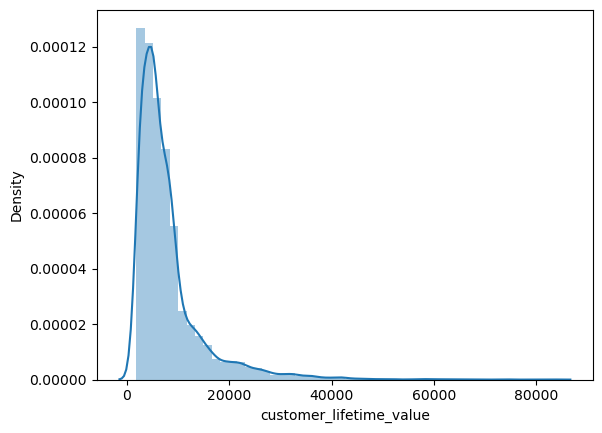

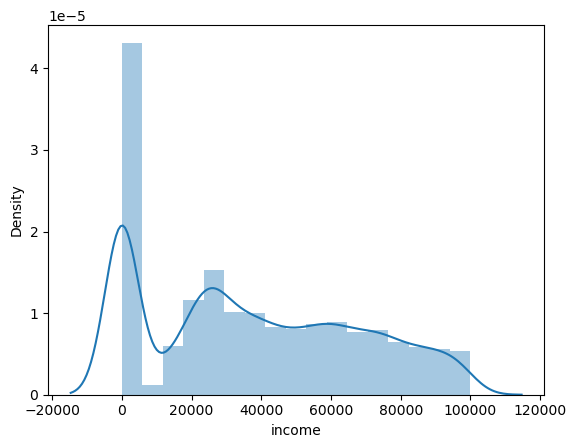

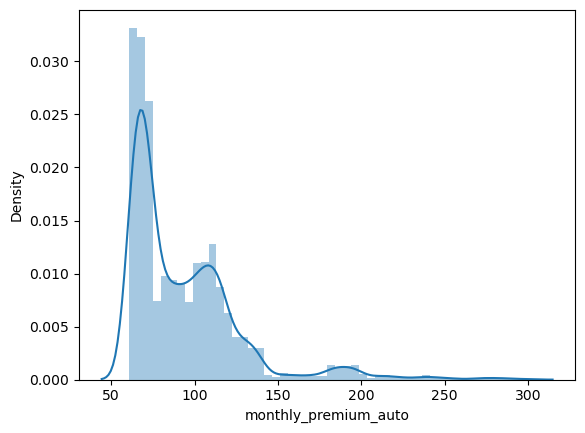

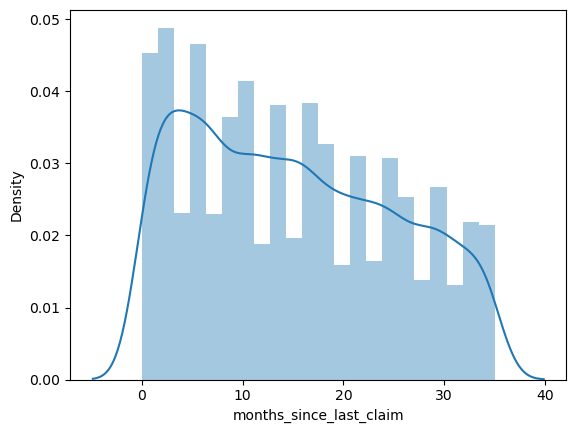

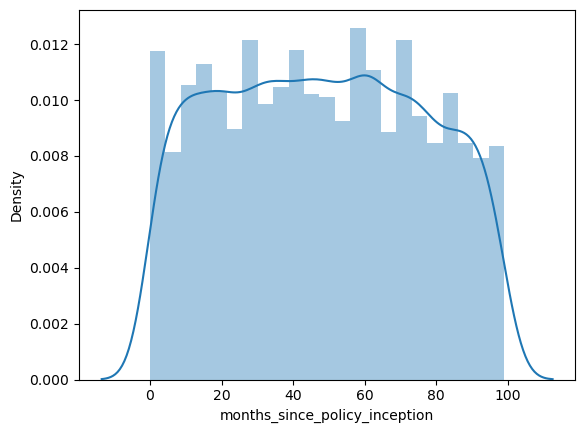

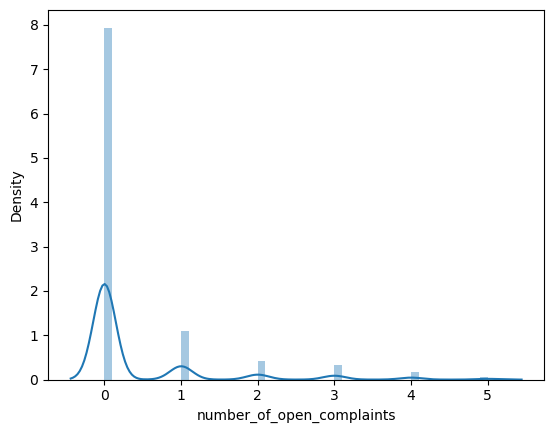

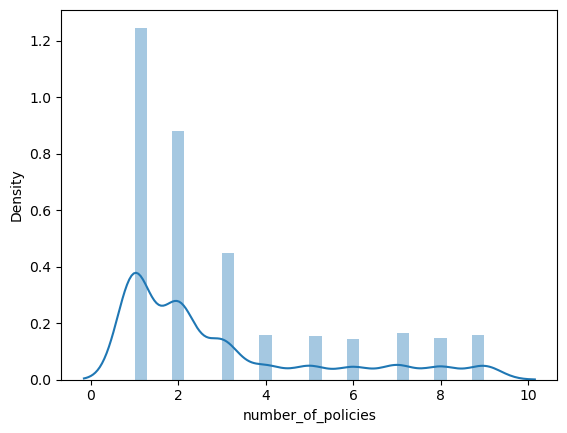

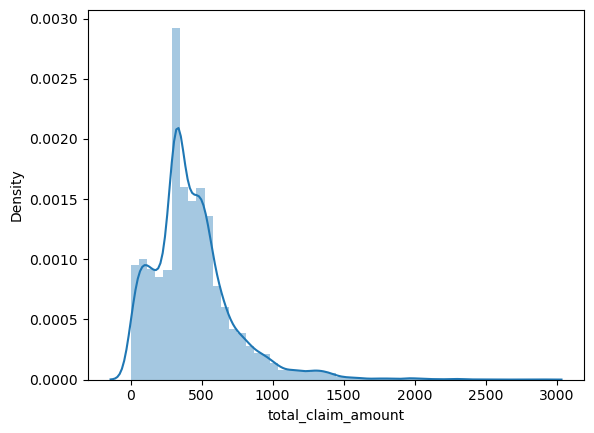

In [15]:
for column in numerical.columns:
    sns.distplot(data[column])
    plt.show()

Only "costumer_lifetime_value" follows distribution which skewed to the right.
All the others are neither symmetric or normal distributed.

#### Correlations

In [16]:
#Creating a Correlation plot:

correlations_matrix = numerical.corr(method="spearman")
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.055395,0.453933,0.005126,-0.002429,-0.031312,0.488860,0.210598
income,0.055395,1.000000,-0.017608,-0.025784,-0.001945,0.006334,-0.010273,-0.401598
monthly_premium_auto,0.453933,-0.017608,1.000000,-0.005989,0.014596,-0.012751,-0.006936,0.522261
months_since_last_claim,0.005126,-0.025784,-0.005989,1.000000,-0.048269,0.005736,0.011439,-0.000782
months_since_policy_inception,-0.002429,-0.001945,0.014596,-0.048269,1.000000,-0.013233,-0.009546,-0.006569
number_of_open_complaints,-0.031312,0.006334,-0.012751,0.005736,-0.013233,1.000000,0.001523,-0.024694
number_of_policies,0.488860,-0.010273,-0.006936,0.011439,-0.009546,0.001523,1.000000,-0.011100
total_claim_amount,0.210598,-0.401598,0.522261,-0.000782,-0.006569,-0.024694,-0.011100,1.000000


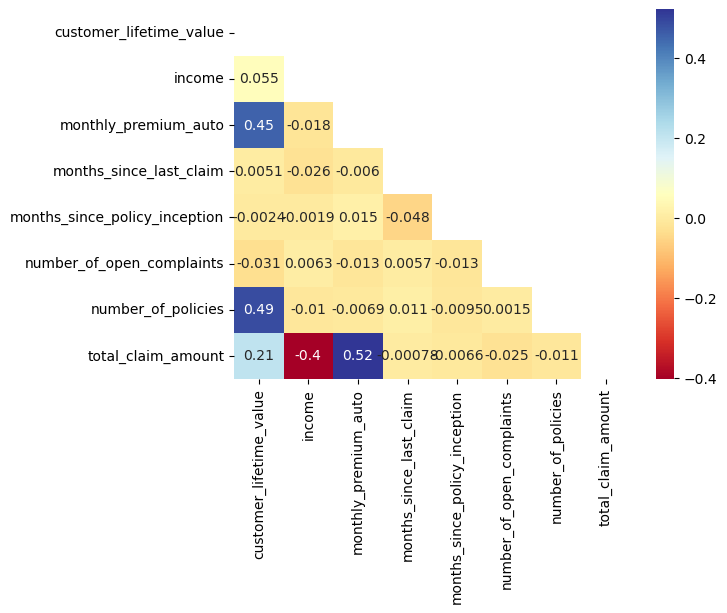

In [17]:
mask = np.zeros_like(correlations_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correlations_matrix, annot=True, mask=mask,cmap='RdYlBu')
plt.show()

The highest correlation is 0.49 (between "customer_lifetime_value" and "number of policies").

Because of this high correlation, I am going to remove "number_of_policies" column because between the two columns, is less correlated with the target "total_claim_amount".

In [18]:
#Remove insignificant high correlated columns (Which does not include our Target "Total Claim Amount")

numerical = numerical.drop (columns = ["number_of_policies"], axis = 1)
numerical.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,total_claim_amount
0,2763.519279,56274,69,32,5,0,384.811147
1,6979.535903,0,94,13,42,0,1131.464935
2,12887.431650,48767,108,18,38,0,566.472247
3,7645.861827,0,106,18,65,0,529.881344
4,2813.692575,43836,73,12,44,0,138.130879


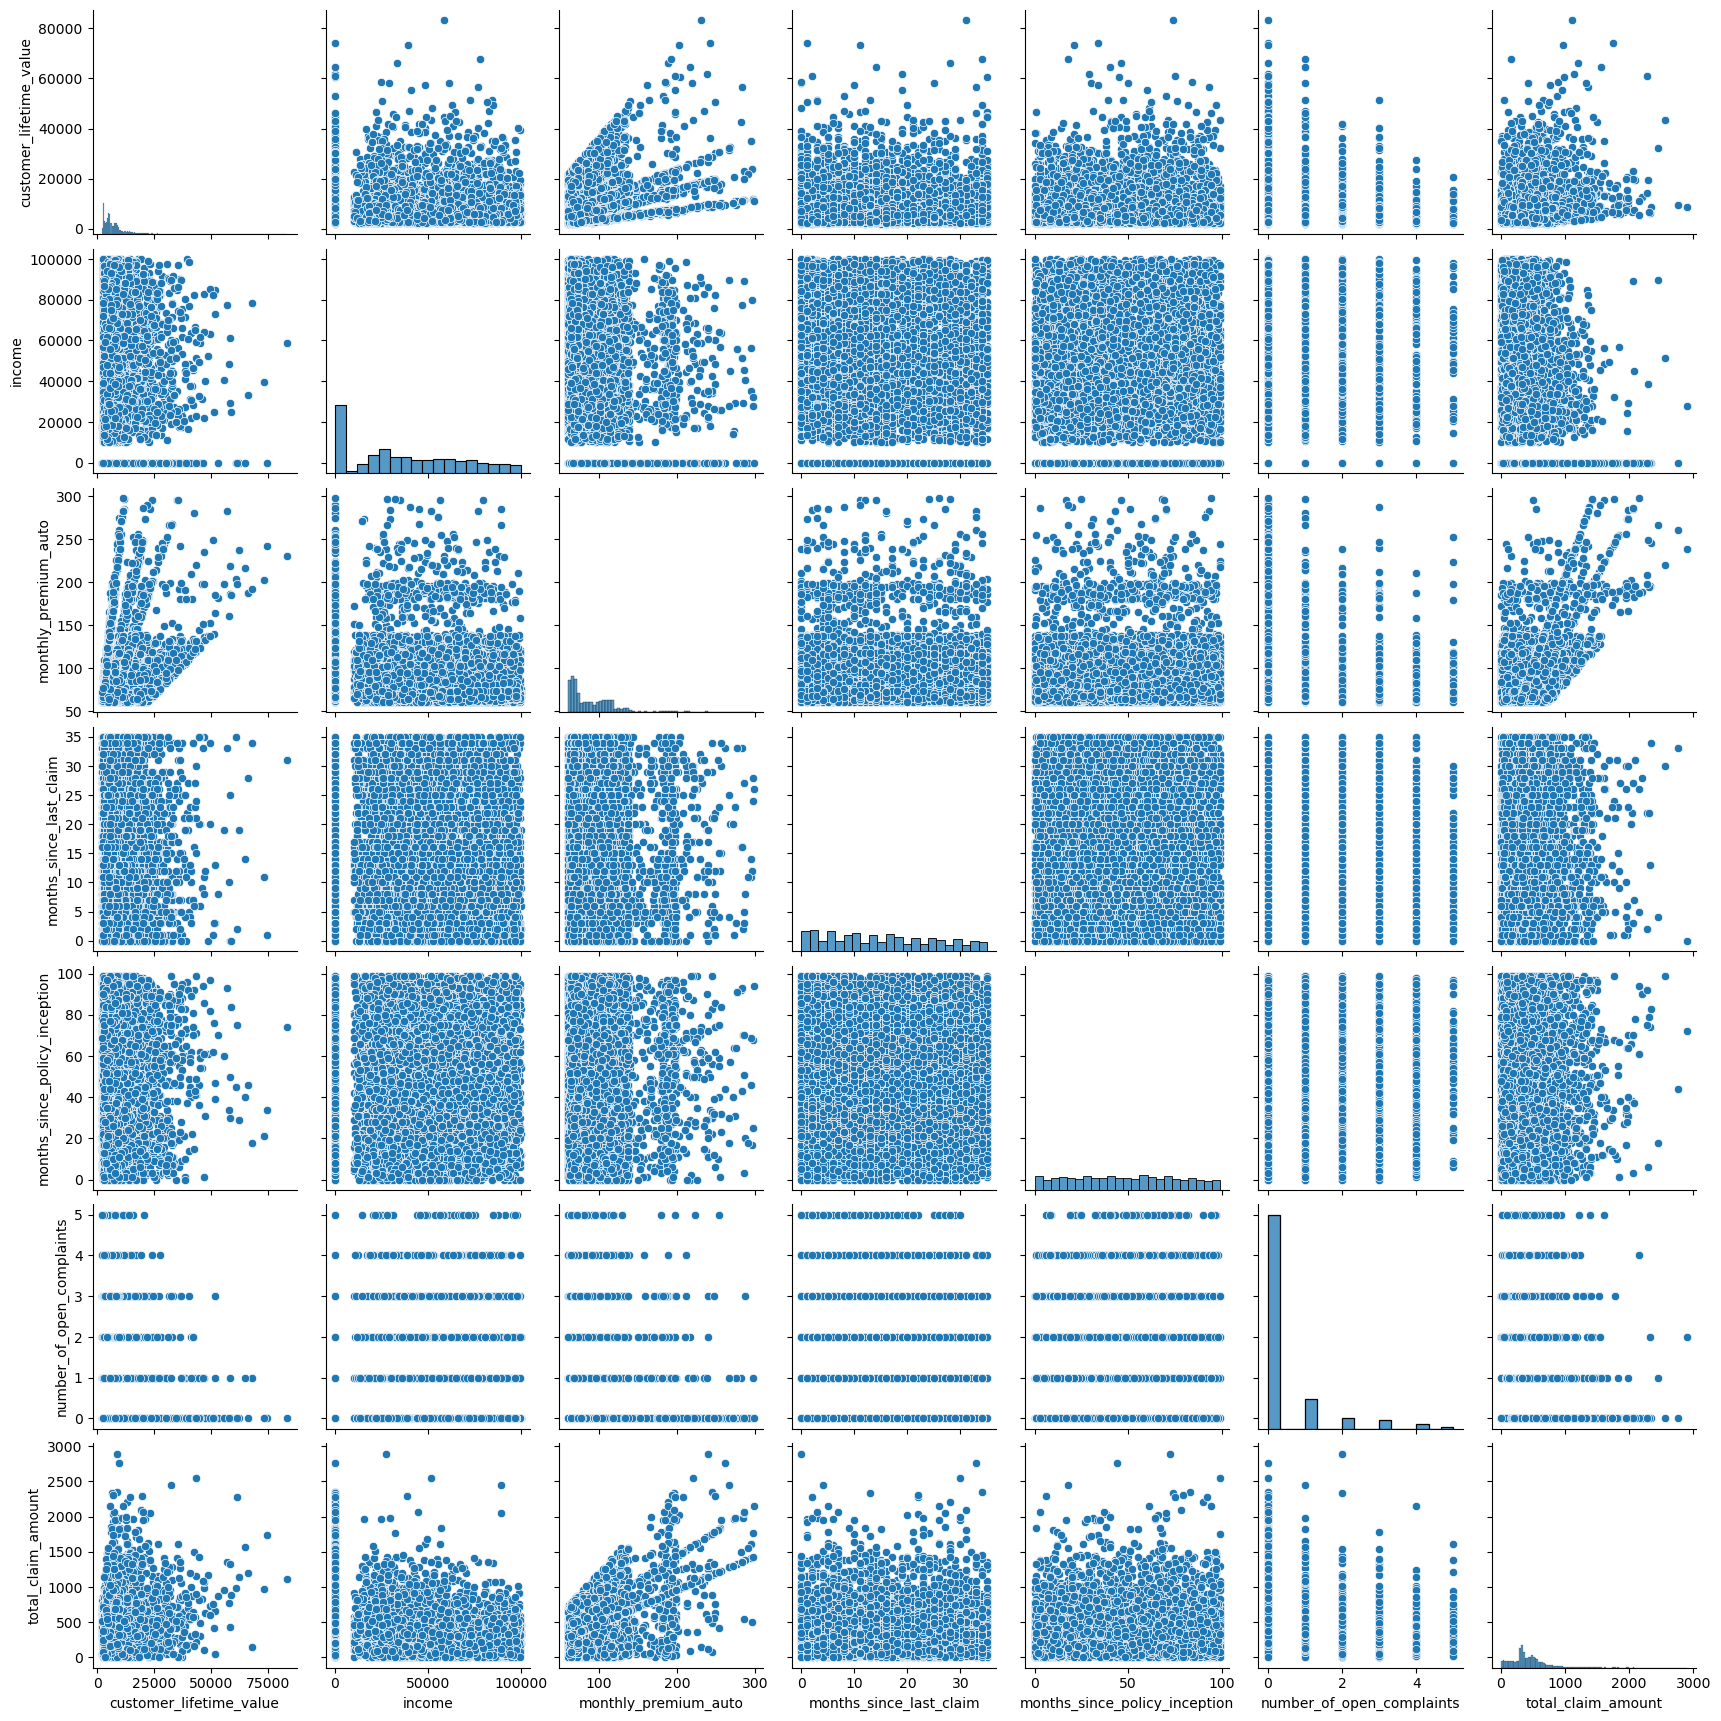

In [19]:
#covariance visualization

sns.pairplot(numerical)

# 04 - Processing Data

#### Box-Cox Transformation

In [20]:
numerical_trans = numerical.copy()

def boxcox_transform(data):
    numeric_cols = numerical_trans.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        numerical_trans[column] = np.where(numerical_trans[column]<=0, np.NAN, numerical_trans[column]) 
        numerical_trans[column] = numerical_trans[column].fillna(numerical_trans[column].mean())
        transformed_data, ci = stats.boxcox(numerical_trans[column])
        numerical_trans[column] = transformed_data
        _ci[column] = [ci] 
    return numerical, _ci
numerical, _ci = boxcox_transform(numerical_trans)
numerical_trans.head()


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,total_claim_amount
0,2.703839,1247.937066,0.685347,10.876059,3.017887,0.648045,33.035752
1,2.754926,1167.961720,0.685871,5.808248,18.780377,0.648045,56.357614
2,2.780772,1144.063081,0.686039,7.347815,17.389171,0.648045,40.071789
3,2.759125,1167.961720,0.686018,7.347815,26.160800,0.648045,38.763252
4,2.704995,1072.375744,0.685461,5.471294,19.461641,0.648045,19.560154


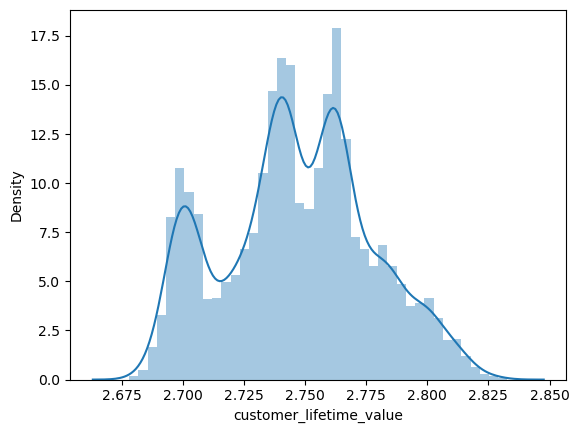

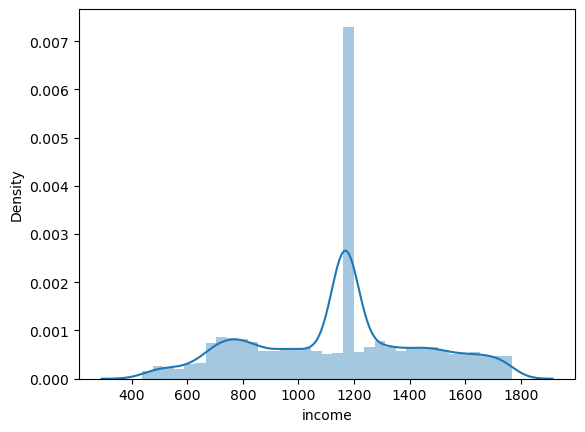

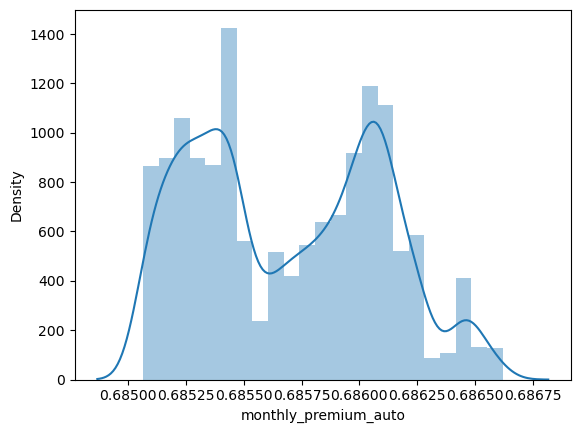

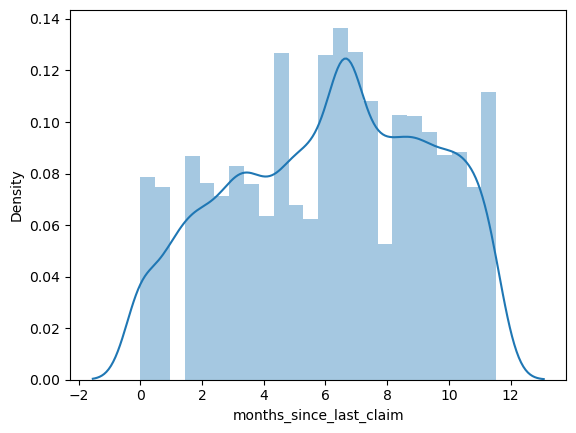

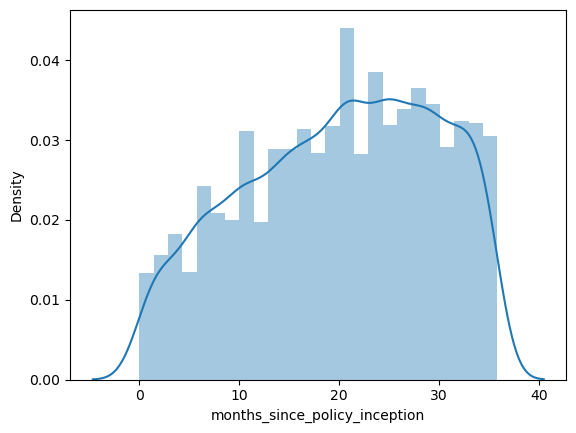

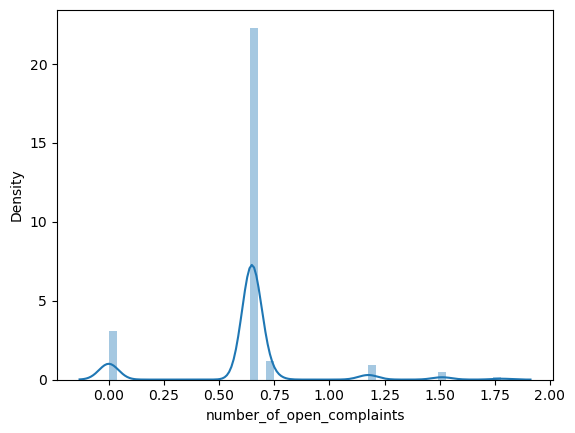

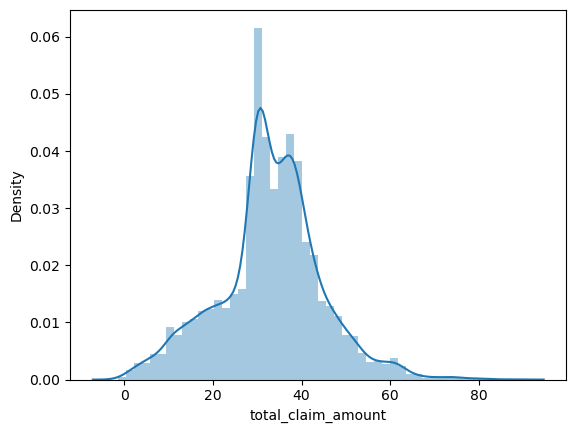

In [21]:
# See the changes in the distributions

for column in numerical_trans.select_dtypes(np.number).columns:
    sns.distplot(numerical_trans[column])
    plt.show()
    

#### Remove Outliers

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'customer_lifetime_value'),
  Text(1, 0, 'income'),
  Text(2, 0, 'monthly_premium_auto'),
  Text(3, 0, 'months_since_last_claim'),
  Text(4, 0, 'months_since_policy_inception'),
  Text(5, 0, 'number_of_open_complaints'),
  Text(6, 0, 'total_claim_amount')])

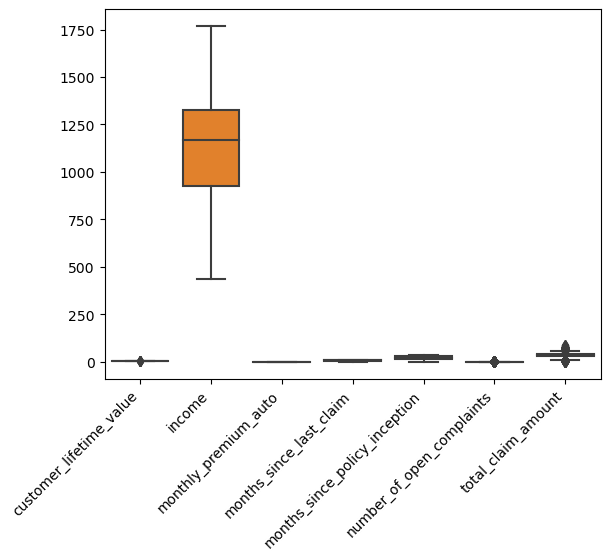

In [22]:
#checking outliers for numericals

sns.boxplot(data=numerical_trans)
plt.xticks(rotation=45, ha='right')


<AxesSubplot:xlabel='total_claim_amount'>

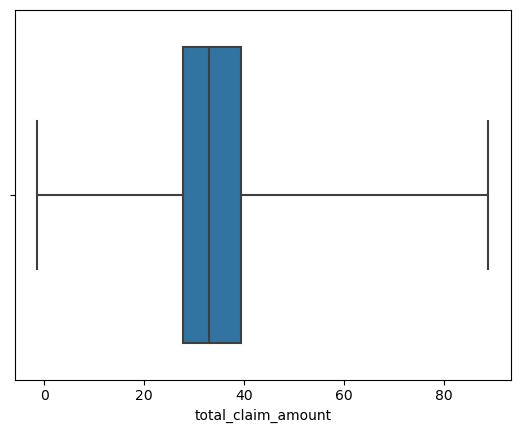

In [23]:
# Check outliers in "total_claim_amount" because when looking at 75% percentile and max value there is a big difference.


sns.boxplot(numerical_trans["total_claim_amount"], whis=5)


In [24]:
#Remove outliers
iqr = np.percentile(numerical_trans["total_claim_amount"],75) - np.percentile(numerical_trans["total_claim_amount"],25)


In [25]:
# Define the limits

upper_limit = np.percentile(numerical_trans["total_claim_amount"],75) + 1.5*iqr    
lower_limit = np.percentile(numerical_trans["total_claim_amount"],25) - 1.5*iqr
upper_limit, lower_limit


(56.88805475796333, 10.252206166894457)

In [26]:
# Remove them from the data

numerical_trans = numerical_trans[(numerical_trans["total_claim_amount"]>lower_limit) & (numerical_trans["total_claim_amount"]<upper_limit)]

### Categorical Data Exploration

In [27]:
#Drop "effective_to_date" and "customer" column because of it does  not mean anything for the Model.

categorical = categorical.drop (columns = ["customer","effective_to_date"], axis = 1)
categorical.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


#### One Hot/Label Encoding 

In [28]:
encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(categorical)

OneHotEncoder(drop='first')

In [29]:

encoded = encoder.transform(categorical).toarray() 
cat_encoded = pd.DataFrame(encoded)

In [30]:
# Add column names to the dataframe

cat_encoded.columns = encoder.get_feature_names_out()
cat_encoded.head()

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,education_Master,employment_status_Employed,employment_status_Medical Leave,employment_status_Retired,employment_status_Unemployed,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [31]:
#Concat DataFrames

dataconc = pd.concat([numerical_trans, cat_encoded], axis = 1)
dataconc.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,total_claim_amount,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,education_Master,employment_status_Employed,employment_status_Medical Leave,employment_status_Retired,employment_status_Unemployed,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,2.703839,1247.937066,0.685347,10.876059,3.017887,0.648045,33.035752,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,2.754926,1167.961720,0.685871,5.808248,18.780377,0.648045,56.357614,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2.780772,1144.063081,0.686039,7.347815,17.389171,0.648045,40.071789,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,2.759125,1167.961720,0.686018,7.347815,26.160800,0.648045,38.763252,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,2.704995,1072.375744,0.685461,5.471294,19.461641,0.648045,19.560154,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [32]:
dataconc.isna().sum()

customer_lifetime_value            600
income                             600
monthly_premium_auto               600
months_since_last_claim            600
months_since_policy_inception      600
number_of_open_complaints          600
total_claim_amount                 600
state_California                     0
state_Nevada                         0
state_Oregon                         0
state_Washington                     0
response_Yes                         0
coverage_Extended                    0
coverage_Premium                     0
education_College                    0
education_Doctor                     0
education_High School or Below       0
education_Master                     0
employment_status_Employed           0
employment_status_Medical Leave      0
employment_status_Retired            0
employment_status_Unemployed         0
gender_M                             0
location_code_Suburban               0
location_code_Urban                  0
marital_status_Married   

In [33]:
numerical_trans.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,total_claim_amount
count,8534.000000,8534.000000,8534.000000,8534.000000,8534.000000,8534.000000,8534.000000
mean,2.745934,1139.712778,0.685678,6.146245,20.022729,0.618468,33.089977
std,0.030491,302.451665,0.000395,3.171926,9.580088,0.272687,9.494097
min,2.677981,437.840563,0.685064,0.000000,0.000000,0.000000,10.253810
25%,2.725559,916.052039,0.685316,3.561530,12.535528,0.648045,28.732045
50%,2.744998,1167.961720,0.685668,6.450279,20.964768,0.648045,33.091083
75%,2.765437,1324.573428,0.686039,8.711113,27.953390,0.648045,39.130307
max,2.832791,1768.720501,0.686618,11.537190,35.813279,1.779382,56.855977


In [34]:
#Replacing nulls with median (50 percentile), because it will give me an error if nulls are present when training the model.

dataconc["customer_lifetime_value"]=dataconc["customer_lifetime_value"].fillna(2.744998)

In [35]:
dataconc["income"]=dataconc["income"].fillna(1167.961720)

In [36]:
dataconc["monthly_premium_auto"]=dataconc["monthly_premium_auto"].fillna(0.685668)

In [37]:
dataconc["months_since_last_claim"]=dataconc["months_since_last_claim"].fillna(6.450279)

In [38]:
dataconc["months_since_policy_inception"]=dataconc["months_since_policy_inception"].fillna(20.964768)

In [39]:
dataconc["number_of_open_complaints"]=dataconc["number_of_open_complaints"].fillna(0.648045)

In [40]:
dataconc["total_claim_amount"]=dataconc["total_claim_amount"].fillna(33.091083)

### Splitting data (X-y split)

In [41]:
y = dataconc["total_claim_amount"]
X = dataconc.drop(["total_claim_amount"], axis=1)

#### Normalization(Scaling X)

In [42]:
#MinMaxScaler(): scaling data to the range of 0 and 1.

X_scal = MinMaxScaler().fit(X) 
X_minmax = X_scal.transform(X) 
X_minmax

array([[0.16703311, 0.6086924 , 0.18256279, ..., 1.        , 1.        ,
        0.        ],
       [0.4970298 , 0.54860032, 0.5192813 , ..., 0.        , 1.        ,
        0.        ],
       [0.66398297, 0.5306433 , 0.6276666 , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.43289749, 0.54860032, 0.38889356, ..., 0.        , 1.        ,
        0.        ],
       [0.43289749, 0.54860032, 0.38889356, ..., 0.        , 1.        ,
        0.        ],
       [0.43289749, 0.54860032, 0.38889356, ..., 0.        , 0.        ,
        1.        ]])

In [43]:
#Transform X_minmax to a DataFrame

X_scaled = pd.DataFrame(X_minmax,columns=X.columns)
X_scaled.head() 

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,education_Master,employment_status_Employed,employment_status_Medical Leave,employment_status_Retired,employment_status_Unemployed,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,0.167033,0.608692,0.182563,0.942696,0.084267,0.364197,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.497030,0.548600,0.519281,0.503437,0.524397,0.364197,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.663983,0.530643,0.627667,0.636881,0.485551,0.364197,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.524149,0.548600,0.614319,0.636881,0.730478,0.364197,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.174501,0.476779,0.255738,0.474231,0.543420,0.364197,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# 05 - Modeling

### Train-test Split

In [44]:
#Spliting TARGET and INDEPENDENT features, one for training and one for testing.


X_train, X_test, y_train , y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [45]:
len (X)

9134

In [46]:
len(X_train)

6393

In [47]:
len(X_test)

2741


### Apply Linear Regression Model


In [48]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

# 06 - Model Validation

In [56]:
predictions  = model.predict(X_test)
predictions

array([22.34352755, 40.50567133, 45.97662064, ..., 35.77459639,
       18.59763095, 31.72343179])

In [57]:
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
print("r2 = ", r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)

r2 =  0.7344038501783077
RMSE =  4.798963792501522
MSE =  23.030053481740588


In [58]:
#Because I have applied the Box-Cox to the Target I need to invert the transformation!

from scipy.special import inv_boxcox
predictions = inv_boxcox(predictions, _ci["total_claim_amount"]) 


In [59]:
# calculate the modified metrics


RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)

print("RMSE = ", RMSE)
print("MSE = ", MSE)
print("MAE = ", MAE)

RMSE =  413.8234888906575
MSE =  171249.8799576361
MAE =  378.93226515475425


In [60]:
numerical["total_claim_amount"].describe()

# RMSE is 413. Min value of target is 0, and max value is 2893 therefore 413 is good. 75% of values are below 547.

count    9134.000000
mean      434.088794
std       290.500092
min         0.099007
25%       272.258244
50%       383.945434
75%       547.514839
max      2893.239678
Name: total_claim_amount, dtype: float64

In [63]:
#Create dataframe for visualising the differences between real and predicted values

results = pd.DataFrame()
results['true'] = y_test
results['pred'] = predictions
results['diff'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

,true,pred,diff
754,12.907072,178.432355,165.525283
50,41.021216,578.890145,537.868929
4272,53.068040,747.737858,694.669818
1630,36.484398,579.945529,543.461131
3938,35.201787,552.506447,517.304660
...,...,...,...
4570,14.770702,81.037004,66.266302
8481,39.559740,641.879967,602.320227
6034,33.616116,451.131125,417.515008
9027,16.921916,125.455298,108.533382


<AxesSubplot:xlabel='true', ylabel='pred'>

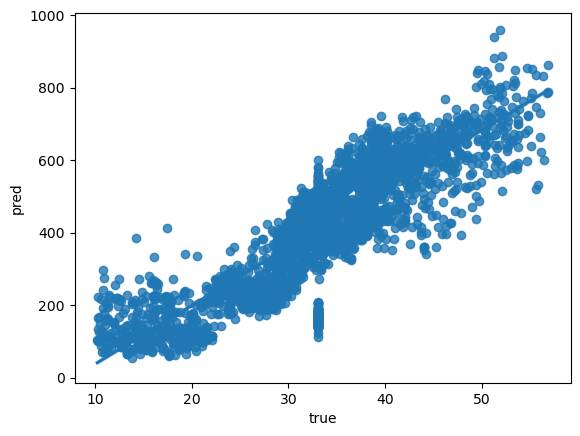

In [64]:
sns.regplot(results['true'], results['pred'])

# Reporting

R2 is 0.73. The closer the r-squared value is to 1, the better the fit.

RMSE is 413. Min value of target is 0, and 75% of target values are below 547. therefore 413 is good.   

RMSE estimates the deviation of the actual y-values from the regression line. RMSE is a metric to evalate model performance.